# 0 环境检测和安装

In [2]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -U openmim
!mim install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (698/698), done.
remote: Compressing objects: 100% (435/435), done.
remote: Total 15132 (delta 287), reused 472 (delta 231), pack-reused 14434
Receiving objects: 100% (15132/15132), 20.28 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (10607/10607), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 14.4 MB/s eta 0:00:00
     

# 1 数据集准备和可视化

In [4]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
!unzip -q Watermelon87_Semantic_Seg_Mask.zip -d data

--2023-06-17 13:14:18--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  5.28MB/s    in 2.4s    

2023-06-17 13:14:22 (5.28 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230222/13230222]



In [5]:
# fix dataset
!mv data/Watermelon87_Semantic_Seg_Mask/img_dir/train/21746.1.jpg data/Watermelon87_Semantic_Seg_Mask/img_dir/train/21746.jpg
!mv data/Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg@1280w_1l_2o_100sh.jpg data/Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg

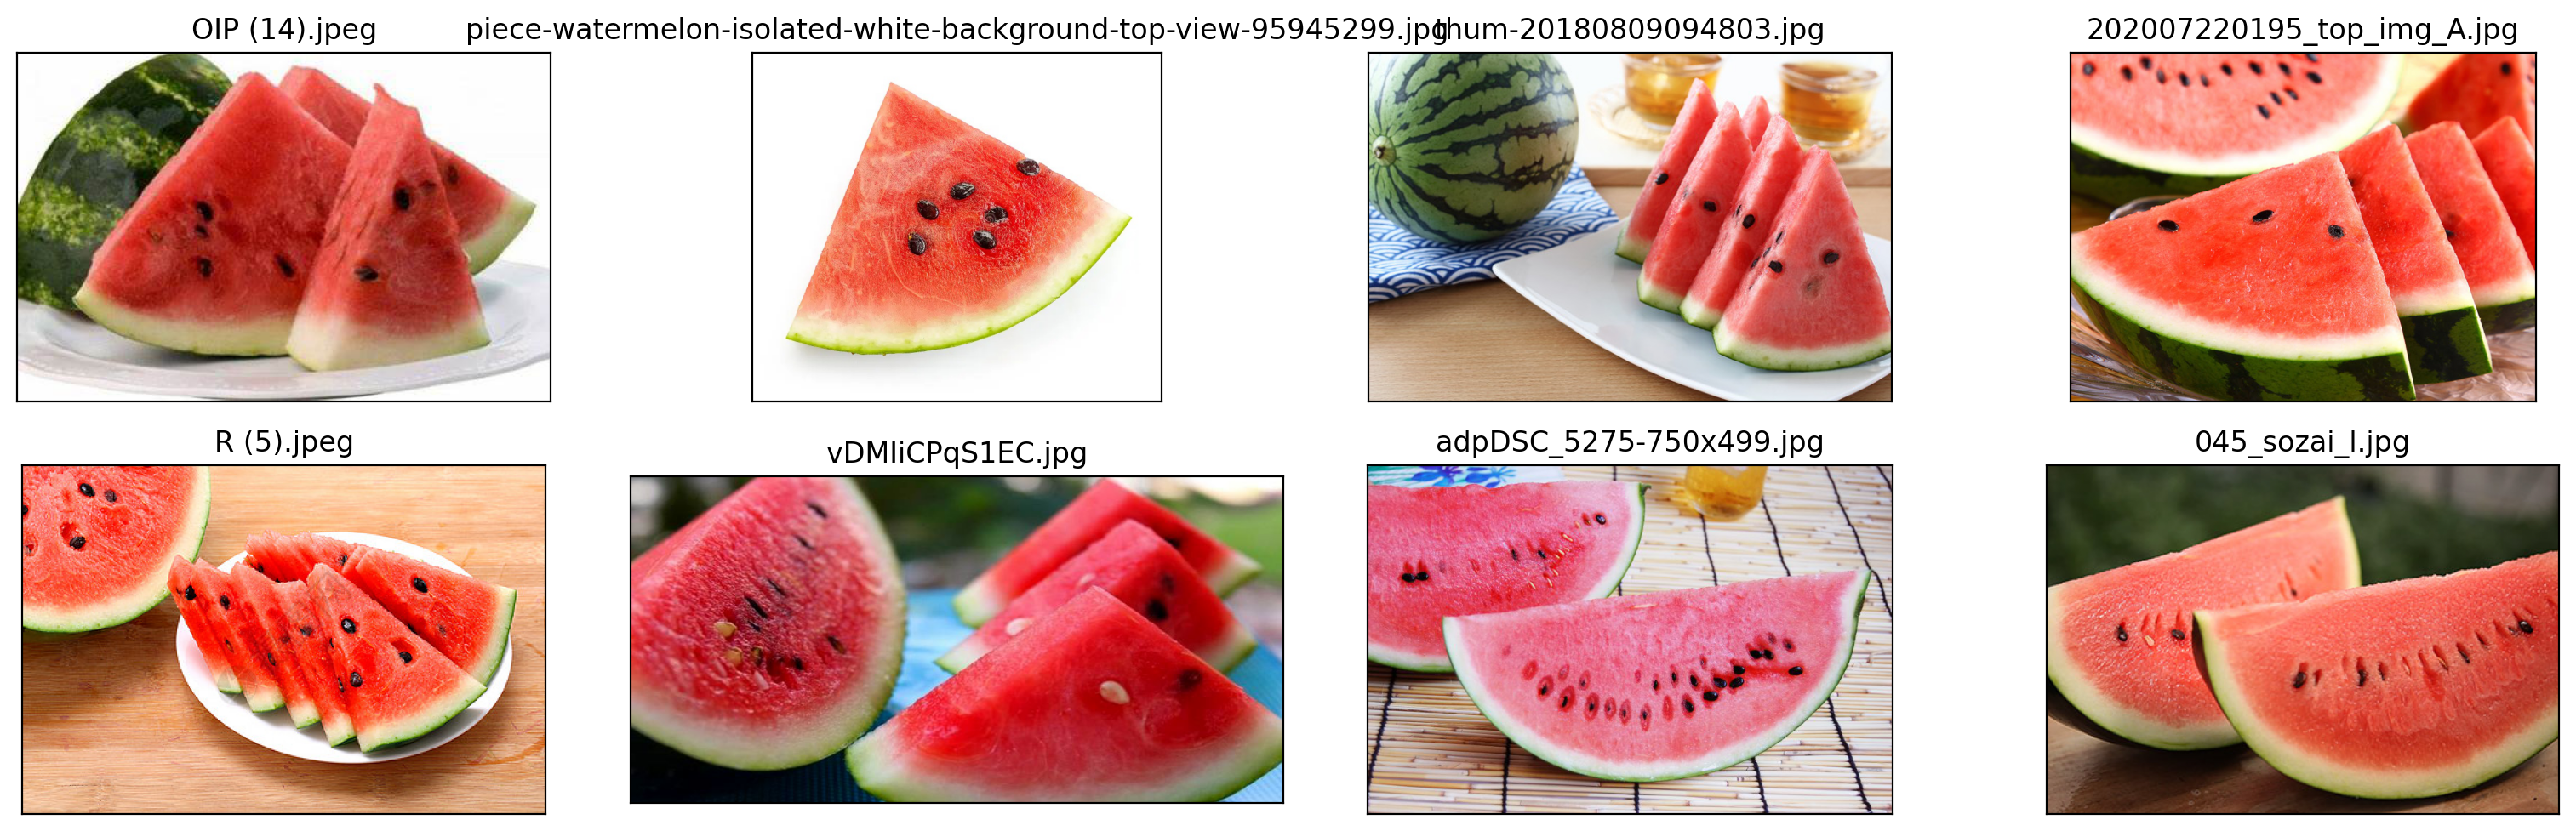

In [6]:
# 可视化图片

import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

image_paths= [filename for filename in os.listdir('data/Watermelon87_Semantic_Seg_Mask/img_dir/train/')][0:8]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open('data/Watermelon87_Semantic_Seg_Mask/img_dir/train/'+filename).convert("RGB")

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

# 2 自定义数据集

In [6]:
# from mmseg.registry import DATASETS
# from mmseg.datasets.basesegdataset import BaseSegDataset

# @DATASETS.register_module()
# class WatermelonDataset(BaseSegDataset):
#     # 类别和对应的可视化配色
#     METAINFO = dict(
#     classes=('/', 'red', 'green', 'white', 'seed-black', 'seed-white'),
#     palette=[[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 255], [64, 0, 128], [128, 128, 128]])

#     # 指定图像扩展名、标注扩展名
#     def __init__(self,
#            img_suffix='.jpg',
#            seg_map_suffix='.png',
#            reduce_zero_label=False, # 类别ID为0的类别是否需要除去
#            **kwargs) -> None:
#       super().__init__(
#            img_suffix=img_suffix,
#            seg_map_suffix=seg_map_suffix,
#            reduce_zero_label=reduce_zero_label,
#            **kwargs)

# 3 自定义配置文件

In [7]:
config_watermelon = """
_base_ = 'configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'


num_classes = 6

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255)
model = dict(
    type='EncoderDecoder',
    data_preprocessor=data_preprocessor,
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=norm_cfg,
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        dropout_ratio=0.1,
        num_classes=num_classes,
        norm_cfg=norm_cfg,
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_input=False,
        dropout_ratio=0.1,
        num_classes=num_classes,
        norm_cfg=norm_cfg,
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=0.4)),
    # model training and testing settings
    train_cfg=dict(),
    test_cfg=dict(mode='whole'))

# dataset settings
dataset_type = 'BaseSegDataset'
metainfo = dict(
    classes=('/', 'red', 'green', 'white', 'seed-black', 'seed-white'),
    palette=[[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 255], [64, 0, 128], [128, 128, 128]])
data_root = 'data/Watermelon87_Semantic_Seg_Mask'
crop_size = (512, 1024)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='RandomResize',
        scale=(2048, 1024),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs')
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]
img_ratios = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
tta_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(
        type='TestTimeAug',
        transforms=[
            [
                dict(type='Resize', scale_factor=r, keep_ratio=True)
                for r in img_ratios
            ],
            [
                dict(type='RandomFlip', prob=0., direction='horizontal'),
                dict(type='RandomFlip', prob=1., direction='horizontal')
            ], [dict(type='LoadAnnotations')], [dict(type='PackSegInputs')]
        ])
]
train_dataloader = dict(
    batch_size=4,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='InfiniteSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(
            img_path='img_dir/train', seg_map_path='ann_dir/train'),
        pipeline=train_pipeline))
val_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(
            img_path='img_dir/val', seg_map_path='ann_dir/val'),
        pipeline=test_pipeline))
test_dataloader = val_dataloader

val_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])
test_evaluator = val_evaluator

# optimizer
optimizer = dict(type='SGD', lr=0.001, momentum=0.9, weight_decay=0.0005)
optim_wrapper = dict(type='OptimWrapper', optimizer=optimizer, clip_grad=None)
# learning policy
param_scheduler = [
    dict(
        type='PolyLR',
        eta_min=1e-4,
        power=0.9,
        begin=0,
        end=20000,
        by_epoch=False)
]
# training schedule for 1000
train_cfg = dict(type='IterBasedTrainLoop', max_iters=1000, val_interval=80)
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', by_epoch=False, interval=400),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='SegVisualizationHook'))

load_from = 'https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
"""

with open('pspnet_r50_watermelon.py', 'w') as f:
    f.write(config_watermelon)

# 4 模型训练

In [8]:
!python tools/train.py pspnet_r50_watermelon.py

06/17 13:15:10 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 649182843
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch

# 5 推理可视化

In [9]:
!python demo/image_demo_with_inferencer.py /content/mmsegmentation/data/Watermelon87_Semantic_Seg_Mask/img_dir/val/17897490_93d9666602_z.jpg pspnet_r50_watermelon.py --checkpoint /content/mmsegmentation/work_dirs/pspnet_r50_watermelon/iter_800.pth --device cuda:0 --out-dir result

Loads checkpoint by local backend from path: /content/mmsegmentation/work_dirs/pspnet_r50_watermelon/iter_800.pth
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
06/17 13:31:09 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initia

In [17]:
import cv2
img_path = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/val/17897490_93d9666602_z.jpg'
mask_path = 'result/pred/00000000_pred.png'
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

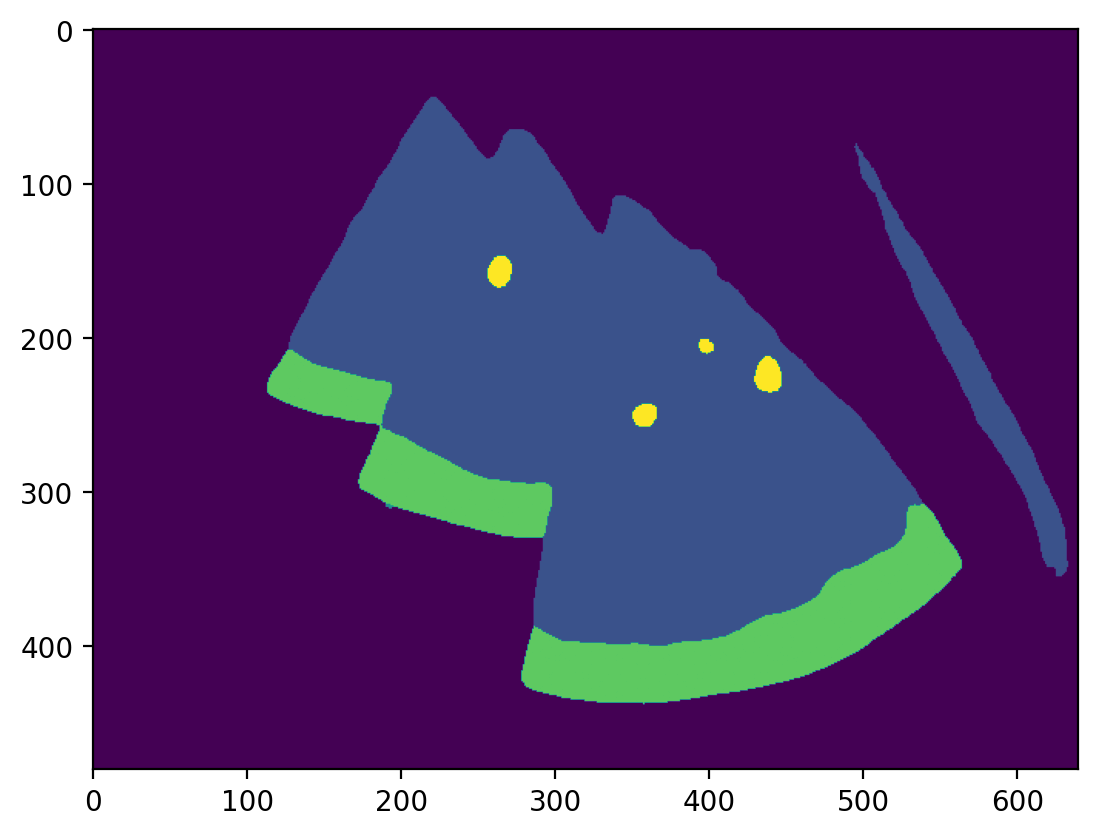

In [13]:
import matplotlib.pyplot as plt
plt.imshow(mask[:,:,0])

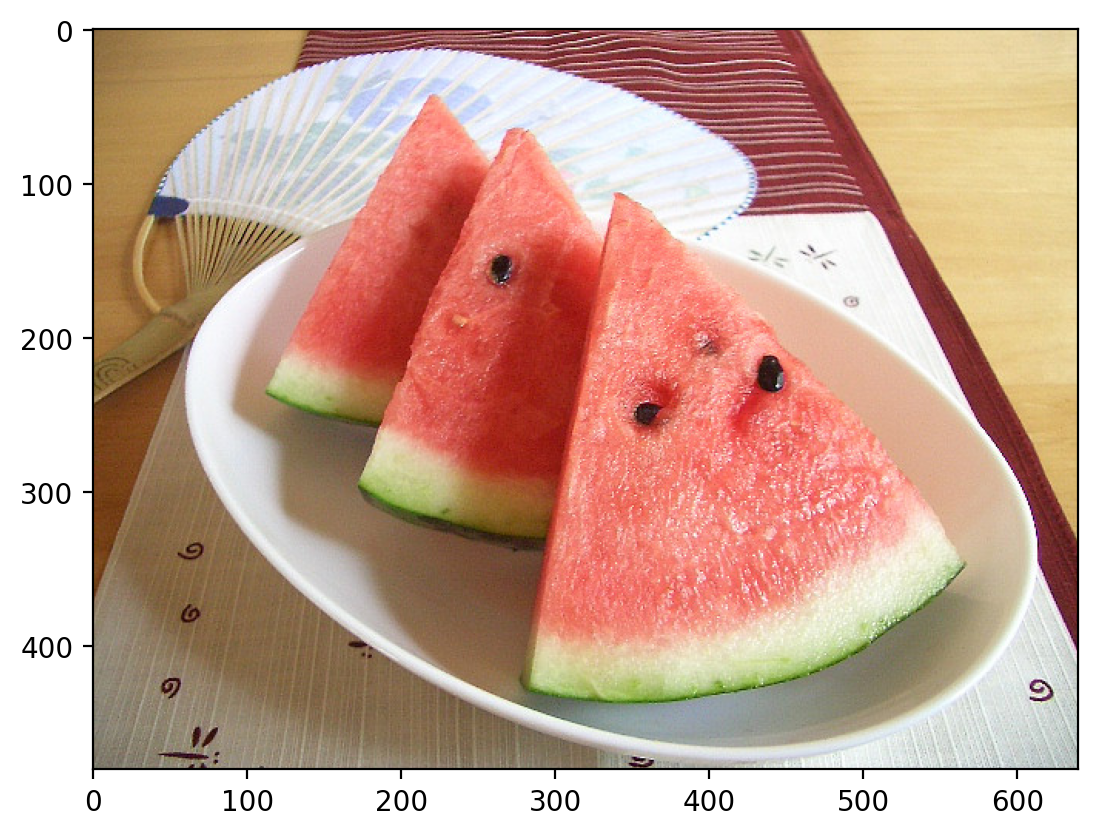

In [18]:
plt.imshow(img[:,:,::-1])